In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from bs4 import BeautifulSoup
import time
import requests
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
import praw
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC

In [35]:
train=pd.read_csv('./large_train_sample.csv')

In [18]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [36]:
train.dtypes.head(20)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [8]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [19]:
df=pd.get_dummies(df, columns=['workclass'])

In [40]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [21]:
df=pd.get_dummies(df, columns=['marital-status'])

In [22]:
df=pd.get_dummies(df, columns=['occupation'])

In [23]:
df=pd.get_dummies(df, columns=['sex'])

In [24]:
df=pd.get_dummies(df, columns=['relationship'])

In [25]:
df=pd.get_dummies(df, columns=['wage'])

In [27]:
df=pd.get_dummies(df, columns=['native-country'])

In [30]:
df.to_csv('./large_train_sample_CLEANED.csv')

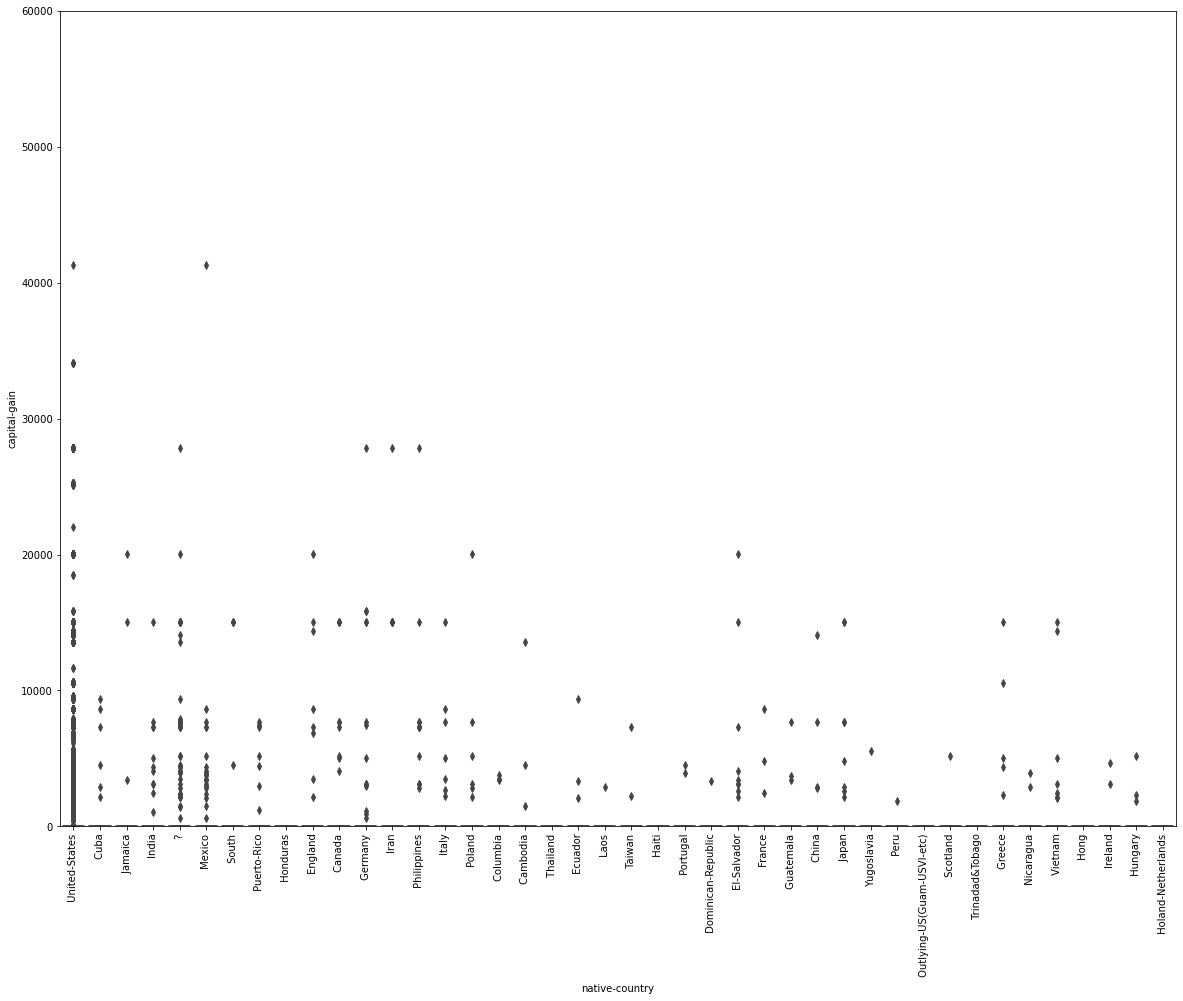

In [34]:
plt.figure(figsize=(20,15))
sns.boxplot(x='native-country', y='capital-gain', data=df)
plt.ylim(0, 60000)
plt.xticks(rotation=90);

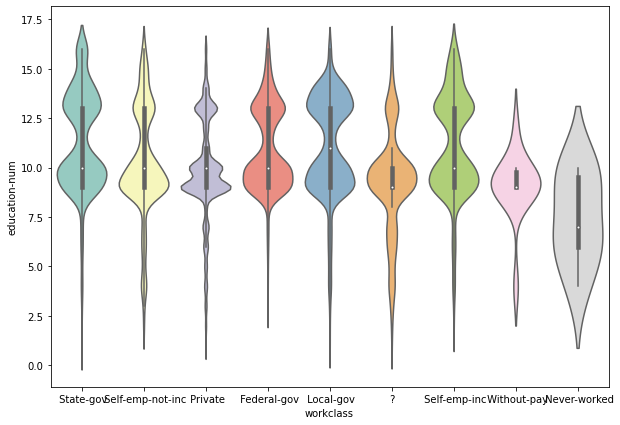

In [39]:
plt.figure(figsize=(10,7))
sns.violinplot(x='workclass', y='education-num',
                    data=train,
                    scale='width', palette='Set3');

In [47]:
train['capital-gain'].value_counts(ascending=True)

1111         1
22040        1
6097         1
1455         1
4931         1
         ...  
99999      159
7298       246
7688       284
15024      347
0        29849
Name: capital-gain, Length: 119, dtype: int64

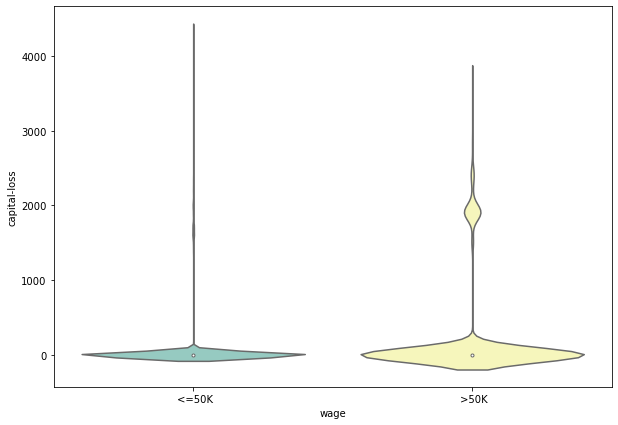

In [54]:
plt.figure(figsize=(10,7))
sns.violinplot(x='wage', y='capital-loss',
                    data=train,
                    scale='width', 
            palette='Set3');

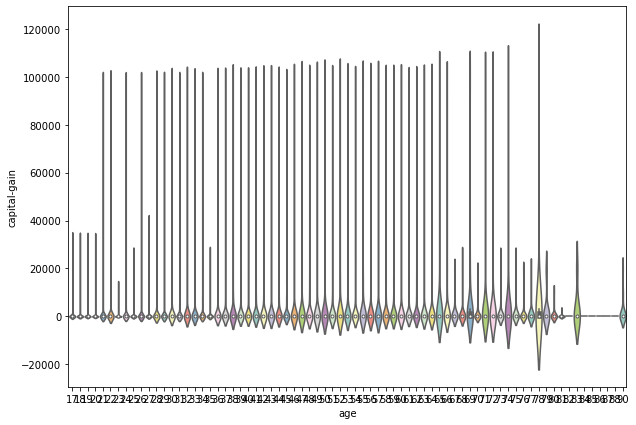

In [60]:
plt.figure(figsize=(10,7))
sns.violinplot(x='age', y='capital-gain',
                    data=train,
                    scale='width', 
            palette='Set3');

In [67]:
z=range(0,32561)
z

range(0, 32561)

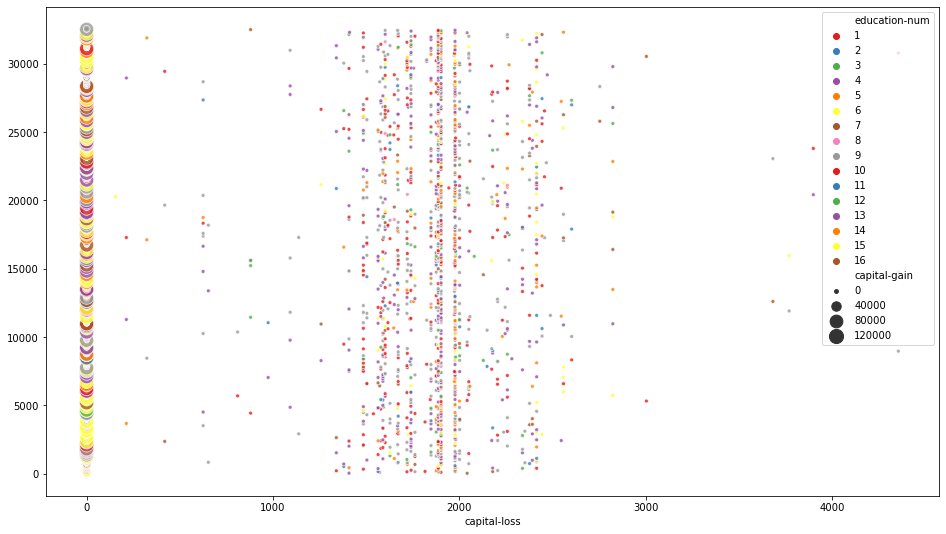

In [68]:

plt.figure(figsize=(16,9))
sns.scatterplot(x='capital-loss', y=z,hue='education-num',alpha=.8,size='capital-gain',sizes=(15, 200),x_bins=200,
                    data=train,
                    #scale='width', 
            palette='Set1')

In [ ]:
sns.pairplot(df, hue=‘sex’)

KeyboardInterrupt: 

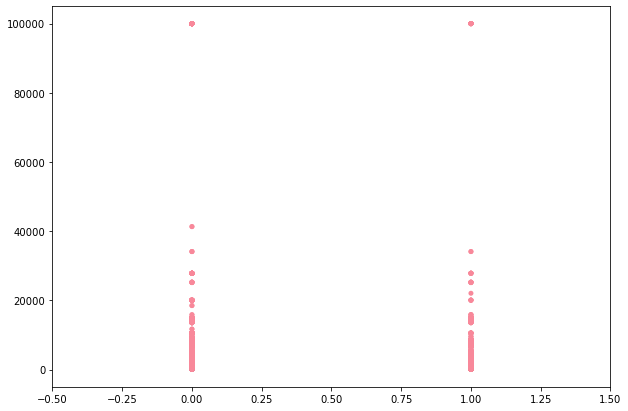

In [69]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='sex', y='capital-gain', data=train,hue='capital-loss')
plt.ylabel('Sale Price',size=20)
plt.xlabel('Overall Cond',size=20)
plt.legend().set_visible(False)
plt.title('Sale Price vs Overall Condition',size=30);

In [41]:
df.groupby(by="education").mean()['capital-gain'].sort_values(ascending=False)

education
 Prof-school     10414.416667
 Doctorate        4770.145278
 Masters          2562.563552
 Bachelors        1756.299533
 Preschool         898.392157
 Assoc-voc         715.051375
 Assoc-acdm        640.399250
 Some-college      598.824167
 HS-grad           576.800114
 10th              404.574491
 9th               342.089494
 12th              284.087760
 7th-8th           233.939628
 11th              215.097872
 5th-6th           176.021021
 1st-4th           125.875000
Name: capital-gain, dtype: float64

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(x='sex', y='capital-loss',
                    data=train,
                    scale='width', 
            palette='Set3');